In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import lstsq
import cv2

In [2]:
Vi=5
Vg=28
Step=4
#CC1=(116, 140)
#CC2=(48, 240)
#CC3=(130, 200)
CC1=(30, 100) #AlNI
CC2=(80, 240)
CC3=(130, 200)
CC4=(146, 140) #AlI
CC5=(160, 160)
#CC1=(10, 102) #RhNI
#CC2=(60, 242)
#CC3=(130, 200)
#CC4=(129, 140) #RhI
#CC5=(150, 160)
RS=3
RSS=5
RB=20
Color=0 
Thickness=-1 
Material="Al"
nameCurrent="75" #28
#nameCurrent="20" #38
#nameCurrent="10" #48
MaterialRAW="RAWII9.2"+Material
name5="DataExperimental"
name2RAW="ImEC"
name3RAW="Frequency.txt"
name5RAW="CNRM.txt"
name6RAW="ImECEWM.txt"
name0=name5+"/"+MaterialRAW+str(Vg)+"_"+nameCurrent+"/"+name5+"/"+MaterialRAW+str(Vg)+"_"+nameCurrent+name2RAW
name1=name0+"/"+name3RAW

In [3]:
nameM3="MaterialesS/AireM.txt"
nameM5="MaterialesS/SiliconeM.txt"
MaterialAire = np.genfromtxt(nameM3)
MaterialSilicona = np.genfromtxt(nameM5)
Material1=MaterialSilicona
Material2=MaterialAire
W=55*(10**(-6))
Npixeles=256

In [4]:
Dtb=np.genfromtxt(name1)
Energy=[]
Distri=[]
for i in range(len(Dtb)):
        Energy.append(Dtb[i][0])
        Distri.append(Dtb[i][1])

In [5]:
BinT = []
for i in range(Vi, Vg, Step):
    Bin = np.arange(i, min(i+Step, Vg+1), 1)
    BinT.append(Bin)

In [6]:
def EAverage(Energy,Distri,S,Vi):
    E=Energy[np.min(S)-Vi:np.max(S)+1-Vi]
    D=Distri[np.min(S)-Vi:np.max(S)+1-Vi]
    Sum1=sum(n * e for n, e in zip(D, E))
    Sum2=sum(D)
    Ea=Sum1/Sum2
    return Ea

In [7]:
def IP(name):
    f=-np.log(name)
    return f

In [8]:
def TE(E,Material1,Material2,m):
    Q=[Material1[int(E[m])-1],Material2[int(E[m])-1]]
    return Q

In [9]:
def PI(name,inicial,final,h,y):
    P=np.zeros(y-h)
    for i in range(inicial,final):
        P=P+name[i,h:y]
    mean=P/(final-inicial)
    return mean

In [10]:
def BL(name1,name2,Material1,Material2,E,m):
    Ab1=-Material1[int(E[m])-1]*name1-Material2[int(E[m])-1]*name2
    Ab2=np.exp(Ab1)
    return Ab1,Ab2

In [11]:
def SEG(name):
    B=[]
    for i in range(len(name)):
        for j in range(len(name)):
            if name[i,j]!=0:
                B.append(name[i,j])

    B_A=np.mean(B)
    B_DA=np.array(B)
    B_DE=B_DA.std()
    return B_A,B_DE

In [12]:
def ImSeg(name,a,b,s,color,thickness):
    I=name.copy()
    cv2.circle(I, a, s, color, thickness)
    cv2.circle(I, b, s, color, thickness)
    Sign=name-I
    SDs=SEG(Sign)[0]
    return I,SDs

In [13]:
def ImSegg(name,g,j,color,thickness):
    D=name.copy()
    cv2.circle(D, g, j, color, thickness)
    Back=name-D
    BDs=SEG(Back)[0]
    DDs=SEG(Back)[1]
    return D,BDs,DDs

In [14]:
def CNR(S_p,B_A,B_DE):
    CNR_0=(np.abs(S_p-B_A))/B_DE
    return CNR_0

In [15]:
def CNRDF(name,a,b,g,s,j,color,thickness):
    DSS=ImSeg(name,a,b,s,color,thickness)[1]
    BSS=ImSegg(name,g,j,color,thickness)[1]
    DBSS=ImSegg(name,g,j,color,thickness)[2]
    D=CNR(DSS,BSS,DBSS)
    return D

In [16]:
def CNRDF2(name,a,b,g,j,color,thickness):
    DSS=ImSegg(name,a,b,color,thickness)[1]
    BSS=ImSegg(name,g,j,color,thickness)[1]
    DBSS=ImSegg(name,g,j,color,thickness)[2]
    D=CNR(DSS,BSS,DBSS)
    return D

In [17]:
E=[]
for i in range(len(BinT)):
    E.append(np.round(EAverage(Energy,Distri,BinT[i],Vi),0))

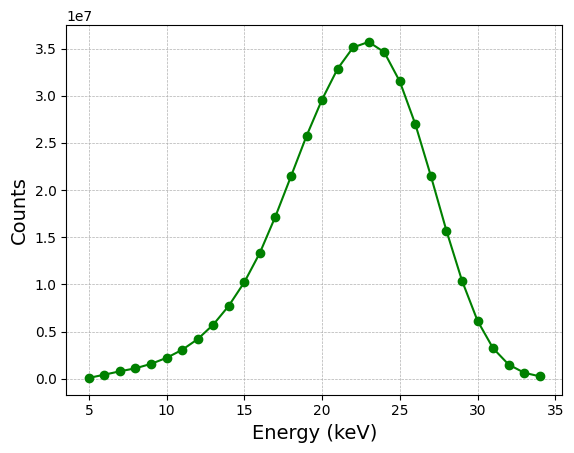

In [18]:
plt.plot(Energy,Distri, '-o', color="green")
plt.xlabel("Energy (keV)",fontsize=14)
plt.ylabel("Counts",fontsize=14)
plt.grid(linestyle = '--', linewidth = 0.5)

In [19]:
I=[]
for i in range(len(BinT)):
    I.append(np.genfromtxt(name0+"/"+name2RAW+"_"+str(np.min(BinT[i]))+"-"+str(np.max(BinT[i]))+".txt"))

In [20]:
IU=[]    
for i in range(len(E)):
    G=IP(I[i])
    IU.append(G)

In [21]:
Ni=1
Nf=len(E)
Step=1
MI=[]
for j in range(Npixeles):
    SS=[]
    for i in range(Npixeles):    
        SSF=[]
        for a in range(Ni,Nf,Step):
            SSF.append([IU[a][j][i]])
        SS.append(SSF)
    MI.append(np.array(SS))

In [22]:
MA=[]
for a in range(Ni,Nf,Step):
    MA.append(TE(E,Material1,Material2,a))
MA=np.array(MA)

In [23]:
Etest=[]
for a in range(Ni,Nf,Step):
    Etest.append(E[a])
print(Etest)

[np.float64(11.0), np.float64(15.0), np.float64(19.0), np.float64(23.0), np.float64(26.0)]


In [24]:
Esp_Material1=np.zeros((Npixeles,Npixeles))
Esp_Material2=np.zeros((Npixeles,Npixeles))

In [25]:
for j in range(Npixeles):
    for i in range(Npixeles):
        Mt, Mresiduals, Mrank, Ms = lstsq(MA, MI[i][j])
        Esp_Material1[i,j]=Mt[0]
        Esp_Material2[i,j]=Mt[1]

C:\Users\USER\AppData\Local\Temp\ipykernel_14056\3074531011.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Esp_Material1[i,j]=Mt[0]
C:\Users\USER\AppData\Local\Temp\ipykernel_14056\3074531011.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Esp_Material2[i,j]=Mt[1]


In [26]:
II=[]
for i in range(len(E)):
    II.append(BL(Esp_Material1,Esp_Material2,Material1,Material2,E,i)[1])

In [27]:
m=3
print("Energy for No-Implant",E[m])

Energy for No-Implant 19.0


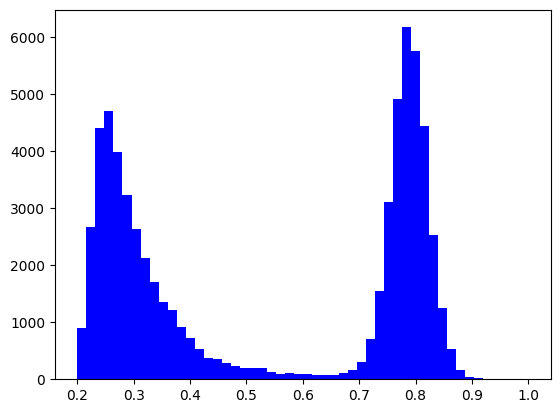

In [28]:
AtenE=plt.hist(np.ravel(I[m]),bins=50,color="blue",range=(0.2,1.))

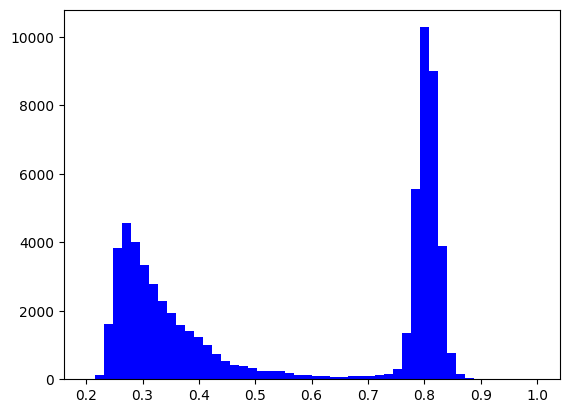

In [29]:
AtenS=plt.hist(np.ravel(II[m]),bins=50,color="blue",range=(0.2,1))

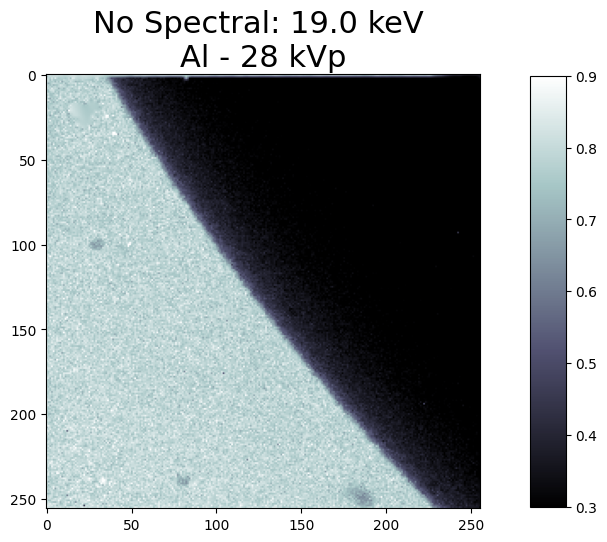

In [30]:
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow(I[m], cmap="bone",vmin=0.3,vmax=0.9)
plt.title("No Spectral: "+str(E[m])+" keV \n"+Material+" - "+str(Vg)+" kVp", fontsize=22)
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.8,aspect=12)

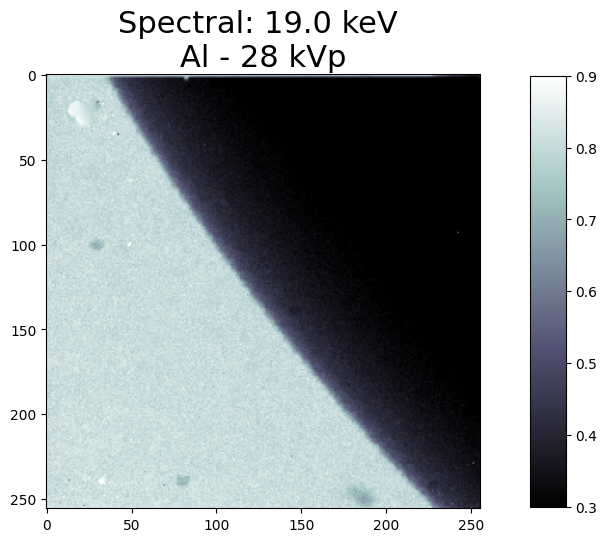

In [31]:
fig, ax = plt.subplots(figsize=(7, 7))
u=ax.imshow(II[m], cmap="bone",vmin=0.3,vmax=0.9)
plt.title("Spectral: "+str(E[m])+" keV \n"+Material+" - "+str(Vg)+" kVp", fontsize=22)
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.8,aspect=12)

In [32]:
CNRLN=[]
CNRLE=[]
for i in range(len(E)):
    CNRLN.append(CNRDF(I[i],CC1,CC2,CC3,RS,RB,Color,Thickness))
    CNRLE.append(CNRDF(II[i],CC1,CC2,CC3,RS,RB,Color,Thickness))
CNRLN=np.array(CNRLN)
CNRLE=np.array(CNRLE)

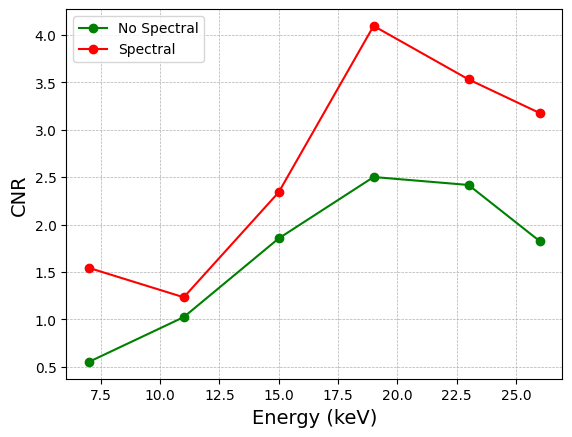

In [33]:
plt.plot(E,CNRLN, '-o', color="green",label="No Spectral")
plt.plot(E,CNRLE, '-o', color="red",label="Spectral")
plt.xlabel("Energy (keV)",fontsize=14)
plt.ylabel("CNR",fontsize=14)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend()